# UTN.BA
## Ciencia de Datos
### Grupo 13
#### Analisis de dataset de portal de e-commerce de cerveza, bebidas alcoholicas y productos relacionados


In [1]:
#Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import datetime as DT
#PCA y Silhouette
from sklearn.decomposition import PCA
from  sklearn.metrics import silhouette_score
#Librerias de Clustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

In [2]:
#IMPORTMOS EL DATASET
tp = pd.read_csv(r'Ecommerce ABI Enriched.csv', delimiter=',', low_memory= 'false')

C:\Users\avelurta\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (21,29,47,62,68,74,82,84,91,103,104,112,126) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### EDA inicial sobre la forma del dataset

In [3]:
#CHEQUEAMOS CUANTAS FILAS Y COLUMNAS TIENE
tp.head(30)
tp.shape

(359388, 141)

In [4]:
#DETALLE DE COLUMNAS
tp.columns

Index(['age', 'birth_date', 'birth_date_day', 'birth_date_month',
       'birth_date_year', 'channel', 'city', 'complement', 'country',
       'created_in',
       ...
       'ideal_glass', 'fermentation', 'style', 'category', 'subcategory',
       'country_of_production', 'is_abi', 'source_schema', 'food_pairing_tip',
       'time.1'],
      dtype='object', length=141)

In [5]:
#Vemos que columnas tienen nulls
tp.isnull().sum()

age                            359388
birth_date                     359388
birth_date_day                 359388
birth_date_month               359388
birth_date_year                359388
channel                        359388
city                           359388
complement                     359388
country                             0
created_in                          0
creation_brand                      0
district                       359388
document_id                    359388
document_id_unify              359388
email                          359388
emails                         359388
facebook_id                    359388
first_name                     359388
full_name                      359388
gender                         359388
id                                  0
id_1                           133049
identification_number          359388
identification_number_unify    359388
is_employee                    359388
last_name                      359388
mobile_numbe

## Conclusion: Tenemos un dataset con casi 360000 samples, pero gran parte de ellas estan en null o parecen ser features repetidas

In [6]:
#Borramos todas las columnas que no sirven
tpf1 = tp.drop(['age','birth_date','birth_date_day','birth_date_month','birth_date_year','created_in','channel','city','complement','district','document_id','document_id_unify','email','emails','facebook_id','first_name','full_name','country_of_production',
       'food_pairing_tip','width','time', 'ideal_glass','table_origin','td_id', 'fermentation','origin_score',
       'style','ideal_temperature', 'local_subcategory', 'is_bundle', 'volume','source_system',
       'abv', 'units_per_sku','length','creation_brand', 'country_of_origin','height','business_name',
       'is_active','identification_number','source','title','td_id','system','currency',
       'identification_number_unify', 'is_employee','last_name','product_spk','business_spk',
       'mobile_number','neighborhood','number','phone_number','state','street','td_global_id',
       'time_creation', 'twitter_id','department','item_id', 'order_status_type','uniqueid', 'zipcode', 'cuit_cuil',
       'dni', 'id_2', 'id_3','gender', 'id_1','unit_discount_local','td_id.1','customer_first_order_period','customer_first_order_year',
       'unit_delivery_cost_local', 'is_incomplete', 'coupon_code','unit_tax_usd','unit_tax_local',
       'order_rating','unit_subtotal_charged_usd','delivery_type',
       'unit_subtotal_charged_local', 'unit_delivery_cost_usd', 'order_type',
       'unit_product_cost_local','unit_margin_usd','product_url','is_test','unit_product_cost_usd',
       'unit_margin_local', 'unit_volume','description', 'body', 'local_category', 'date_retired',
       'is_returnable_glass_bottle', 'ean', 'row_updated_at', 'brand_category','elegible_discount_spk','delivery_address_spk','discount_name','operator_nk','discount_spk','image_url','upc','opt_in','id_4','weight','source_schema','is_abi','time.1','product_nk'], axis = 1)

In [7]:
#Vemos cuantas filas y columnas quedaron
tpf1.shape

(359388, 27)

In [8]:
#Vemos cuantos registros tienen nulls
tpf1.isnull().sum()

country                            0
id                                 0
unit_discount_usd                  0
customer_first_order_date          0
unit_gross_revenue_local           0
unit_delivery_charged_usd          0
unit_net_revenue_usd               0
order_date                         0
order_status                       0
customer_spk                       0
unit_price_charged_local           0
unit_gross_revenue_usd             0
source_system_order_id             0
unit_delivery_charged_local        0
rate_local_do_usd                  0
quantity                           0
unit_price_charged_usd             0
unit_net_revenue_local             0
order_days_after_first_order       0
order_time                         0
row_created_at                     0
sku                              616
brand                           2520
date_created                    2333
name                               0
category                        4954
subcategory                     4954
d

In [9]:
#Separamos la columa order_date en año,mes y dia
tpf1.order_date = pd.to_datetime(tpf1.order_date)
tpf1['year'] = tpf1.order_date.dt.year 
tpf1['month'] = tpf1.order_date.dt.month 
tpf1['day'] = tpf1.order_date.dt.day 
#Pasamos el order_time a datetime
tpf1['order_time'] =  pd.to_datetime(tpf1['order_time'], format='%H:%M:%S')
tpf1.head()

,country,id,unit_discount_usd,customer_first_order_date,unit_gross_revenue_local,unit_delivery_charged_usd,unit_net_revenue_usd,order_date,order_status,customer_spk,...,row_created_at,sku,brand,date_created,name,category,subcategory,year,month,day
0,Chile,"[""cl_casadelacerveza;ded0f554dbb2f3381acf862ad...",0.0000,2018-04-18,884.6936,0.1707,1.3421,2018-04-18,canceled,cl_casadelacerveza;ded0f554dbb2f3381acf862ad69...,...,2018-08-20 05:55:44.844529,69,Goose Island,2018-04-05 10:45:09.088888,Pack Degustación Goose Island + Vaso,unknown,unknown,2018,4,18
1,Chile,"[""cl_casadelacerveza;ded0f554dbb2f3381acf862ad...",0.2652,2018-04-18,722.7899,0.1708,1.0965,2018-04-18,invoiced,cl_casadelacerveza;ded0f554dbb2f3381acf862ad69...,...,2018-08-20 05:55:44.844529,69,Goose Island,2018-04-05 10:45:09.088888,Pack Degustación Goose Island + Vaso,unknown,unknown,2018,4,18
2,Chile,"[""cl_casadelacerveza;ded0f554dbb2f3381acf862ad...",0.0000,2018-04-18,1129.6857,0.2179,1.7138,2018-04-18,canceled,cl_casadelacerveza;ded0f554dbb2f3381acf862ad69...,...,2018-06-08 05:39:56.779021,50,Lowenbrau,2018-04-05 10:45:36.799491,Cerveza Lowenbrau Oktoberfest Botella,Beer,unknown,2018,4,18
3,Chile,"[""cl_casadelacerveza;ded0f554dbb2f3381acf862ad...",0.3382,2018-04-18,921.6156,0.2178,1.3981,2018-04-18,invoiced,cl_casadelacerveza;ded0f554dbb2f3381acf862ad69...,...,2018-06-08 05:39:56.779021,50,Lowenbrau,2018-04-05 10:45:36.799491,Cerveza Lowenbrau Oktoberfest Botella,Beer,unknown,2018,4,18
4,Chile,"[""cl_casadelacerveza;ded0f554dbb2f3381acf862ad...",0.0000,2018-04-18,1046.8875,0.2019,1.5882,2018-04-18,canceled,cl_casadelacerveza;ded0f554dbb2f3381acf862ad69...,...,2018-08-20 07:30:23.707858,449,unknown,2018-05-21 13:00:01.212182,Cerveza Lowenbrau Original Botella,unknown,unknown,2018,4,18


In [1]:
# calculo el percentil 99.9 (se hizo tanteo previo) de la columna "quantity"
perc_999 = tpf1['quantity'].quantile(0.999)
perc_999

NameError: name 'tpf1' is not defined

In [11]:
#quitamos los registros que tengan mas de 48 en quantity
tpf2 = tpf1.loc[tpf1['quantity']<perc_999]
perc_999 = tpf2['quantity'].quantile(0.999)

In [12]:
perc_999

28.0

In [13]:
#Analizamos los quantiles para precios en busca de outliers
tpf2['unit_price_charged_local'].describe()
#Vemos que hay valores muy elevados que procederemos a quitar

count    358899.000000
mean        926.012392
std        1924.569205
min           0.000000
25%         597.000000
50%         817.000000
75%        1115.000000
max      999999.000000
Name: unit_price_charged_local, dtype: float64

In [14]:
per_995 = tpf2['unit_price_charged_local'].quantile(0.995)
per_995

4087.0

In [15]:
tpf3 = tpf2.loc[tpf2['unit_price_charged_local']<per_995]

In [16]:
#Analizamos los quantiles para unit_gross_revenue_local (P*Q) en busca de outliers
tpf3['unit_gross_revenue_local'].describe()
#Vemos que hay valores negativos y algunos muy elevados que procederemos a quitar

count    357052.000000
mean       1433.197382
std        2065.707425
min       -1523.000000
25%         699.000000
50%        1024.000000
75%        1506.000000
max       95400.000000
Name: unit_gross_revenue_local, dtype: float64

In [17]:
perce_995 = tpf3['unit_gross_revenue_local'].quantile(0.996)
perce_995

15808.0

In [18]:
tpf4 = tpf3.loc[tpf3['unit_gross_revenue_local']<perce_995]
tpf4 = tpf4.loc[tpf3['unit_gross_revenue_local']>0]

In [19]:
tpf4['unit_gross_revenue_local'].describe()

count    344381.000000
mean       1391.056883
std        1474.243428
min           0.633500
25%         736.000000
50%        1043.415700
75%        1528.000000
max       15805.000000
Name: unit_gross_revenue_local, dtype: float64

In [20]:
#Filtramos el dataset por country = Argentina
tp_arg = tpf4.loc[tpf2['country'].isin(['Argentina'])]
tp_arg.country.unique()

array(['Argentina'], dtype=object)

In [21]:
#Sabemos que el dataset no esta completo para los años 2016 y 2018, por lo que filtramos el dataset por el año 2017
tp_arg_2017 = tp_arg.loc[tp_arg['year'].isin(['2017'])]
tp_arg_2017.year.unique()

array([2017], dtype=int64)

In [22]:
##Limpiamos mas columnas
tp_arg_2017 = tp_arg_2017.drop(tp_arg_2017.loc[tp_arg['subcategory'].isnull()].index)
tp_arg_2017 = tp_arg_2017.drop(tp_arg_2017.loc[tp_arg['sku'].isnull()].index)
#Cambiamos Grupo Modelo por Corona
tp_arg_2017.brand = tp_arg_2017.brand.replace(to_replace = ['Grupo Modelo'],value = 'Corona')
tp_h = tp_arg_2017.drop(['unit_gross_revenue_usd','source_system_order_id', 'rate_local_do_usd', 'order_days_after_first_order', 'unit_price_charged_usd', 'customer_first_order_date', 'unit_delivery_charged_usd', 'unit_net_revenue_usd', 'row_created_at', 'sku', 'date_created'], axis=1)
tp_h.head(5)

,country,id,unit_discount_usd,unit_gross_revenue_local,order_date,order_status,customer_spk,unit_price_charged_local,unit_delivery_charged_local,quantity,unit_net_revenue_local,order_time,brand,name,category,subcategory,year,month,day
17162,Argentina,"[""ar_bevybar;8b3eb4b88a85ba3eeb60dd24686995c38...",0.0000,1030.0000,2017-09-20,paid,ar_bevybar;8b3eb4b88a85ba3eeb60dd24686995c38b4...,890.0,140.0000,1,788.0530,1900-01-01 18:19:39,Corona,Pack Corona Experience,Beer,Others,2017,9,20
17165,Argentina,"[""ar_bevybar;41434b744330c691cf83b70da3fa080c8...",0.0000,631.0000,2017-06-13,paid,ar_bevybar;41434b744330c691cf83b70da3fa080c85a...,432.0,199.0000,1,493.6944,1900-01-01 12:56:23,Patagonia Brewing Co.,Pack de Cervezas y Vasos Patagonia,Mixed Pack,unknown,2017,6,13
17174,Argentina,"[""ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74...",2.7181,234.6542,2017-02-28,paid,ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74f9...,265.0,14.7222,1,176.2018,1900-01-01 23:33:23,Peñón del Águila,Cerveza Peñón del Águila Kölsch,Beer,unknown,2017,2,28
17175,Argentina,"[""ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74...",1.8052,155.8458,2017-02-28,paid,ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74f9...,44.0,9.7778,4,117.0246,1900-01-01 23:33:23,Peñón del Águila,Cerveza Peñón del Águila Kölsch,Beer,unknown,2017,2,28
17176,Argentina,"[""ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74...",9.0465,910.0000,2017-07-30,paid,ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74f9...,1011.0,49.0000,1,698.5160,1900-01-01 17:15:42,BevyBar,Pack Degustación del Mes de Julio XL,Mixed Pack,unknown,2017,7,30


In [23]:
##Chequeamos que no quedan nulls
tp_h.isnull().sum()

country                        0
id                             0
unit_discount_usd              0
unit_gross_revenue_local       0
order_date                     0
order_status                   0
customer_spk                   0
unit_price_charged_local       0
unit_delivery_charged_local    0
quantity                       0
unit_net_revenue_local         0
order_time                     0
brand                          0
name                           0
category                       0
subcategory                    0
year                           0
month                          0
day                            0
dtype: int64

In [24]:
#Vemos la cantidad de veces que aparece cada id. Esto nos dirá rápidamente si hay outliers.
tp_h.id.value_counts()
#Observamos que una id realizó 3134 compras, por lo cual procederemos a extraerla.

["ar_bevybar;85a4541be6230293ef4f6d91b0df26263a8ae8eb520f1683ee8da148ec4bccb8"]    3135
["ar_bevybar;6ac0a6038ac280d24e192c75507523542b3b808616c9b496bced2ebc9bf8f682"]     124
["ar_bevybar;0cf248d7670517788205b21a00b3b95a7613721f6a2142f2a71ff936505154f7"]     123
["ar_bevybar;2fd602be49f597b8296eaf4ab7db768cadff4daef7acdc2ddb8d2fe87d6f2e67"]      96
["ar_bevybar;0aa3aebd3809cbcccd03f9350a135291a4cc6cf0e91531b1c2ad082eed729957"]      95
["ar_bevybar;2432fc9e5b1b7dc5b0b6798ebc1b31ea5b565d43323a54949788a25b0e3ba2c3"]      82
["ar_bevybar;c68b56ab8a20714b2adc9b2ea0347d85377ce00ef06f7241d6833001601d9e3d"]      81
["ar_bevybar;c35e3b1de2ac34c7cc8189a4be05376b523ccfc022d3c80ebc52afaddcf8a558"]      81
["ar_bevybar;1774a2022f78ca3718e09203117925498c207de6a6463491fea330ab259c8d50"]      80
["ar_bevybar;01aa381f28d5e94ccaa562245f404efc028ab2e44ff2444df15314b64a85c374"]      76
["ar_bevybar;ce8c091f340155e1fe5fd9445cd2bcc873837a0ce2639b86b1cbc217e82296aa"]      74
["ar_bevybar;2fafe310067059488b1

In [25]:
tp_arg_2017.shape

(60896, 30)

In [26]:
#Quitamos el outlier id con 3134 compras en ambos datasets
tp_h.drop(tp_h.loc[tp_h['id']=='["ar_bevybar;85a4541be6230293ef4f6d91b0df26263a8ae8eb520f1683ee8da148ec4bccb8"]'].index, inplace=True)
tp_arg_2017.drop(tp_arg_2017.loc[tp_arg_2017['id']=='["ar_bevybar;85a4541be6230293ef4f6d91b0df26263a8ae8eb520f1683ee8da148ec4bccb8"]'].index, inplace=True)

In [27]:
tp_arg_2017.id.value_counts()

["ar_bevybar;6ac0a6038ac280d24e192c75507523542b3b808616c9b496bced2ebc9bf8f682"]    124
["ar_bevybar;0cf248d7670517788205b21a00b3b95a7613721f6a2142f2a71ff936505154f7"]    123
["ar_bevybar;2fd602be49f597b8296eaf4ab7db768cadff4daef7acdc2ddb8d2fe87d6f2e67"]     96
["ar_bevybar;0aa3aebd3809cbcccd03f9350a135291a4cc6cf0e91531b1c2ad082eed729957"]     95
["ar_bevybar;2432fc9e5b1b7dc5b0b6798ebc1b31ea5b565d43323a54949788a25b0e3ba2c3"]     82
["ar_bevybar;c68b56ab8a20714b2adc9b2ea0347d85377ce00ef06f7241d6833001601d9e3d"]     81
["ar_bevybar;c35e3b1de2ac34c7cc8189a4be05376b523ccfc022d3c80ebc52afaddcf8a558"]     81
["ar_bevybar;1774a2022f78ca3718e09203117925498c207de6a6463491fea330ab259c8d50"]     80
["ar_bevybar;01aa381f28d5e94ccaa562245f404efc028ab2e44ff2444df15314b64a85c374"]     76
["ar_bevybar;ce8c091f340155e1fe5fd9445cd2bcc873837a0ce2639b86b1cbc217e82296aa"]     74
["ar_bevybar;2fafe310067059488b1611913e6fa67222718e3305eb89f6f8a770dcf54d6c84"]     73
["ar_bevybar;f98bfc69f820bf14518f733e1b2c43

In [28]:
##EDA Productos mas vendidos
tp_h.name.value_counts()

Pack Conservadora Corona                                    2601
Copas Stella Artois 330ml - Pack 6 unidades                 2330
Copa Patagonia 400ml - Pack 6 unidades                      1690
Pack de 6 Copas de Edición Limitada                         1560
Pack de 3 Copas Edición Limitada                            1305
Pack de Cervezas Europeas                                   1223
Pack Corona Experience                                      1168
Pack de Cervezas y Vasos Patagonia                          1114
Copa Edición Limitada Stella Artois Brasil                   951
Copa Edición Limitada Stella Artois Uganda                   931
Pack de Cervezas y Chopp Patagonia Octubrefest               912
Destapador Stella Artois                                     727
Cerveza Hoegaarden White                                     654
Copa Edición Limitada Stella Artois Camboya                  611
Copas Stella Artois 250ml - Pack 6 unidades                  599
Copas Stella Artois Navid

In [29]:
tp_h.head()

,country,id,unit_discount_usd,unit_gross_revenue_local,order_date,order_status,customer_spk,unit_price_charged_local,unit_delivery_charged_local,quantity,unit_net_revenue_local,order_time,brand,name,category,subcategory,year,month,day
17162,Argentina,"[""ar_bevybar;8b3eb4b88a85ba3eeb60dd24686995c38...",0.0000,1030.0000,2017-09-20,paid,ar_bevybar;8b3eb4b88a85ba3eeb60dd24686995c38b4...,890.0,140.0000,1,788.0530,1900-01-01 18:19:39,Corona,Pack Corona Experience,Beer,Others,2017,9,20
17165,Argentina,"[""ar_bevybar;41434b744330c691cf83b70da3fa080c8...",0.0000,631.0000,2017-06-13,paid,ar_bevybar;41434b744330c691cf83b70da3fa080c85a...,432.0,199.0000,1,493.6944,1900-01-01 12:56:23,Patagonia Brewing Co.,Pack de Cervezas y Vasos Patagonia,Mixed Pack,unknown,2017,6,13
17174,Argentina,"[""ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74...",2.7181,234.6542,2017-02-28,paid,ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74f9...,265.0,14.7222,1,176.2018,1900-01-01 23:33:23,Peñón del Águila,Cerveza Peñón del Águila Kölsch,Beer,unknown,2017,2,28
17175,Argentina,"[""ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74...",1.8052,155.8458,2017-02-28,paid,ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74f9...,44.0,9.7778,4,117.0246,1900-01-01 23:33:23,Peñón del Águila,Cerveza Peñón del Águila Kölsch,Beer,unknown,2017,2,28
17176,Argentina,"[""ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74...",9.0465,910.0000,2017-07-30,paid,ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74f9...,1011.0,49.0000,1,698.5160,1900-01-01 17:15:42,BevyBar,Pack Degustación del Mes de Julio XL,Mixed Pack,unknown,2017,7,30


In [30]:
tp_h.brand.unique()

array(['Corona', 'Patagonia Brewing Co.', 'Peñón del Águila', 'BevyBar',
       'Stella Artois', 'Bass Brewery', 'Leffe', "Fuller's",
       'Spaten-Franziskaner-Bräu', 'Karlsberg Brauerei',
       'Les Brasseurs de Gayant\xa0', 'Barba Roja', 'Coopers Brewery',
       'Brouwerij Van Steenberge', 'Hoegaarden', 'Backus y Johnston',
       'Löwenbräu', 'Brauerei Beck & Co',
       'Fabricas Nacionales De Cerveza',
       'De La Vaca Tranquila Cervezas Artesanales',
       'Paulaner Brauerei München', 'Duvel Moortgat', 'Zillertal',
       'Baltika Breweries', 'Hofbräu München', 'Chimay',
       'Kronenbourg 1664', 'Czechvar', 'Kulmbacher Brauerei AG',
       'Grimbergen', 'Maredsous', 'Tsingtao',
       'Cervecería y Maltería Quilmes', 'Fábricas Nacionales De Cerveza',
       'Anchor Brewing Company', 'Cervecería Antares', 'Condeminal',
       'Brasserie de Silly', 'SAB Miller', 'Bodega Budeguer', 'Shock Top',
       'Belsh', 'OETTINGER Brauerei GmbH', 'Erdinger Weissbräu',
       'Águila 

In [31]:
#Cambio todos los brands de importadas por 'importadas'
tp_arg_2017.brand = tp_arg_2017.brand.replace(to_replace = ['Cervecería Antares','Flensburger Brauerei','Fábricas Nacionales De Cerveza', 'Fabricas Nacionales De Cerveza', 'Cerveceria Artesanal El Bolson', 'Peñón del Águila', 'Leffe', 'Spaten-Franziskaner-Bräu', 'BBC', 'Cervecería Artesanal El Bolson',
       'Anchor Brewing Company', 'Bass Brewery', 'Hofbräu München',
       'Adnams', "Fuller's", 'Karlsberg Brauerei',
       'Les Brasseurs de Gayant\xa0',
       'Brouwerij Van Steenberge', 'Hoegaarden',
       'Fuegian Beverage Company',
       'De La Vaca Tranquila Cervezas Artesanales', 'Tsingtao',
       'Löwenbräu', 'unknown', 'Barba Roja', 'Coopers Brewery',
       'Backus y Johnston', 'Brauerei Beck & Co', 'MixxTail', 'Shock Top',
       'Bogotá Beer Company',
       'Czechvar', 'Belle-Vue', 'Paulaner Brauerei München',
       'Duvel Moortgat', 'Zillertal', 'Baltika Breweries', 'Chimay',
       'Kronenbourg 1664', 'Kulmbacher Brauerei AG', 'Grimbergen',
       'Maredsous',
       'franziskaner', 'Condeminal', 'Erdinger Weissbräu',
       'Brasserie de Silly', 'SAB Miller','Bodega Budeguer',
       'Skol', 'Belsh', 'OETTINGER Brauerei GmbH', 'Águila Real', 'Hertog Jan', 'Manos Negras', 'Freixenet',
       'The Fran-C Wines', 'Finca Ferrer', 'Bodega Renacer', 'Oranjeboom',
       'Maal Wines', 'Tinto Negro', 'Corbeau Wines',
       'Mosquita Muerta Wines', 'Bodega del Desierto', 'Antigua',
       'Boris Biere', 'Barceló', 'Boddingtons', 'Bombay', 'Jägermeister',
       'Revancha', 'Huentala Wines', 'Bodega Cruz Primero', 'Aura',
       'Harvierstoun', 'Chivas Regal', 'Weidmann', 'Isle of Jura', 'Belenkaya',
       '2km', "Jack Daniel's", 'Johnnie Walker', 'Whyte & Mackay',
       'The Patrón Spirits Company', 'Amarula', 'Havana Club',
       'Matías Riccitelli', 'Mulata', 'Rye', 'Mundo Revés', 'Brahma',
       'Bodega José Luis Mounier', 'José Cuervo', 'Jim Beam', 'Bier Life',
       'Makers Mark', 'Mistral', 'Príncipe de los Apóstoles',
       'Flor de Caña', 'Bacardi', 'Absolut', 'Pravda', 'Greene King',
       'SKYY', 'Hennessy', 'Noctua', 'Jameson', 'Traslapiedra',
       'Bodega Ojo de Vino', 'Tres14', 'Velho Barreiro', 'Van Pur',
       'SIAM', 'Beluga', 'Bottega', 'Campari', 'The Glenrothes',
       'Cinzano', 'Xoriguer', 'El Jimador', 'Kahlúa', 'Malibu', 'Aperol',
       'The Botanist', 'Brasserie de Luxemburgo Mousel - Diekrich',
       'The Famous Grouse', 'MG Destilerías', 'Grand Marnier',
       'Cointreau', 'Finca Beth', 'The Mula Cervezas Especiales',
       'Anima Mundi'],value = 'importada')

In [32]:
#Vemos los brands que quedaron
tp_arg_2017['brand'].unique()

array(['Corona', 'Patagonia Brewing Co.', 'importada', 'BevyBar',
       'Stella Artois', 'Cervecería y Maltería Quilmes'], dtype=object)

In [33]:
np.shape(tp_arg_2017)

(57761, 30)

## Hasta aca tenemos un tp_h identico al original pero con menos columnas, y un tp_arg_2017 con un par mas de columnas agrupado por brand importadas

In [34]:
##Tabla para ver cuantas veces compró cada usuario
compras_usuario = tp_arg_2017.groupby(['id'])['id'].count()
compras_usuario = compras_usuario.loc[compras_usuario < 10]
compras_usuario

id
["ar_bevybar;00005c5b185e25f9c7b9642ca76950fe43e4fcce6c02cbbf7a8768f2dd1ed395"]    3
["ar_bevybar;0004e1e6b290d864e2776edc0ddd5ad41eb651a793dfaaa8a0053d25bcc3b741"]    1
["ar_bevybar;0005c424ba71c03ac51d8a08844d281966d94b9cd2c5392c1d5b502c83c752ab"]    3
["ar_bevybar;0005e62d3b4e32822912913c24ad71de8f1a213bbd7980398cd73f7202677851"]    9
["ar_bevybar;00078c1eb18da02b9da6835c16bdf960a37fb1fa830f0a5c75145bcab5107721"]    4
["ar_bevybar;000a79e8f3fbccdb6ce37315cbbb5d2baeed8e38a1468ad67cfb43c74a79304c"]    1
["ar_bevybar;000e8d3fcdd026d84901038b522daa7dfbee79d49364e087dfc1f604bdded74a"]    3
["ar_bevybar;00165a04cac08882d8389a3ba4e42715a810db0824f4c807e852c57d9711ec2d"]    2
["ar_bevybar;0017ddf1d1f53ebfa4234926764df3610a82e8aacf8d3e62238f792cb7afcb20"]    1
["ar_bevybar;001967fb1a3b3ddd3e46fec548a5211d72147d9c67aa52cc160be253c601b6c6"]    1
["ar_bevybar;002133fa896e207bb223125b31801ad66edfbb84376ce16a9815c18abcf145c6"]    1
["ar_bevybar;0022d9d95d8e4ef52363b1aa4a8b1cad74eaf303020d5db20

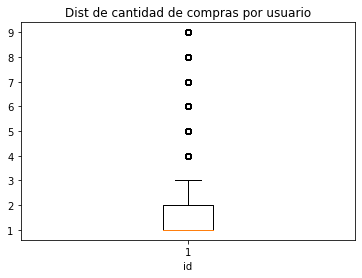

In [35]:
#Graficamos la distribución de compras por usuario
plt.boxplot(compras_usuario)
plt.title("Dist de cantidad de compras por usuario")
plt.xlabel("id")
plt.show()
## En un periodo de un año, la mediana de compra es de una compra.

In [36]:
#Analizamos los quintiles del gasto hecho en cada compra
tp_arg_2017['unit_gross_revenue_local'].quantile([0,0.25,0.5,0.75,0.99,0.999,1])

0.000        2.251700
0.250      190.000000
0.500      650.176500
0.750      955.000000
0.990     3271.600000
0.999     7458.907876
1.000    15732.000000
Name: unit_gross_revenue_local, dtype: float64

In [37]:
#Lo guardamos en la variable "gastos" para graficarlo, pero quitandole el máximo para hacer más visible el gráfico
gastos = tp_arg_2017['unit_gross_revenue_local'].quantile([0,0.25,0.5,0.75,0.99,0.999])
#Analizamos cómo quedaría su distribución
tp_arg_2017['unit_gross_revenue_local'].describe()

count    57761.000000
mean       718.094484
std        714.264389
min          2.251700
25%        190.000000
50%        650.176500
75%        955.000000
max      15732.000000
Name: unit_gross_revenue_local, dtype: float64

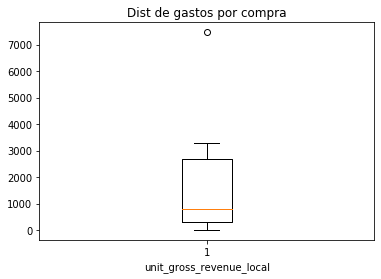

In [38]:
#Graficamos el diagrama de caja de gasto por compra
plt.boxplot(gastos)
plt.title("Dist de gastos por compra")
plt.xlabel("unit_gross_revenue_local")
plt.show()

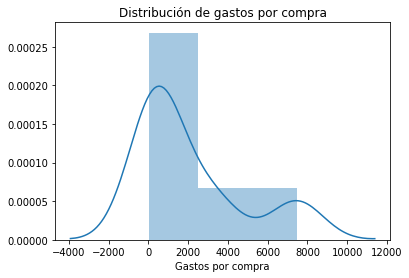

In [39]:
#Graficamos su distribución
sns.distplot(gastos)
plt.title('Distribución de gastos por compra')
plt.xlabel('Gastos por compra')
plt.show()

In [40]:
#Vemos la cantidad de apariciones de estados de pagos
tp_arg_2017.order_status.value_counts()

paid                  56609
pending                 417
refunded                404
partially_refunded      329
partially_paid            2
Name: order_status, dtype: int64

In [41]:
#Dejamos el dataset sin grand_total_is_zero
tp_arg_2017 = tp_arg_2017.loc[tp_arg_2017['order_status'].isin(['paid', 'pending', 'refunded','partially_refunded','autorized','partially_paid'])]
#Dejamos el otro tambien
tp_h = tp_h.loc[tp_h['order_status'].isin(['paid', 'pending', 'refunded','partially_refunded','autorized','partially_paid'])]
tp_h.shape

(57761, 19)

In [42]:
#Analizamos la cantidad de apariciones por cada marca
tp_arg_2017.brand.value_counts()

importada                        19994
Stella Artois                    12311
Patagonia Brewing Co.             9617
BevyBar                           8436
Corona                            6933
Cervecería y Maltería Quilmes      470
Name: brand, dtype: int64

In [43]:
#Analizamos la cantidad de apariciones por cada categoría
tp_arg_2017.category.value_counts()

Mixed Pack      31540
Beer            19622
Merchandise      5569
Wine              676
Spirits           203
unknown           107
Home Brewing       44
Name: category, dtype: int64

In [44]:
#Aca ya queda el dataset
tp_h = tp_h.loc[tp_h['category'].isin(['Mixed Pack', 'Beer', 'Merchandise'])]
tp_arg_2017 = tp_arg_2017.loc[tp_arg_2017['category'].isin(['Mixed Pack', 'Beer', 'Merchandise'])]
tp_arg_2017.shape

(56731, 30)

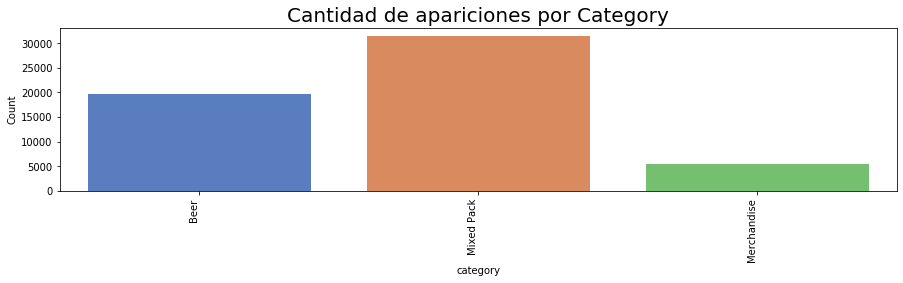

In [45]:
plt.figure(figsize=(15,3))
g = sns.countplot(x="category",data= tp_arg_2017, palette = "muted")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cantidad de apariciones por Category',size = 20)
plt.xlabel("category")
plt.ylabel("Count")
plt.show()

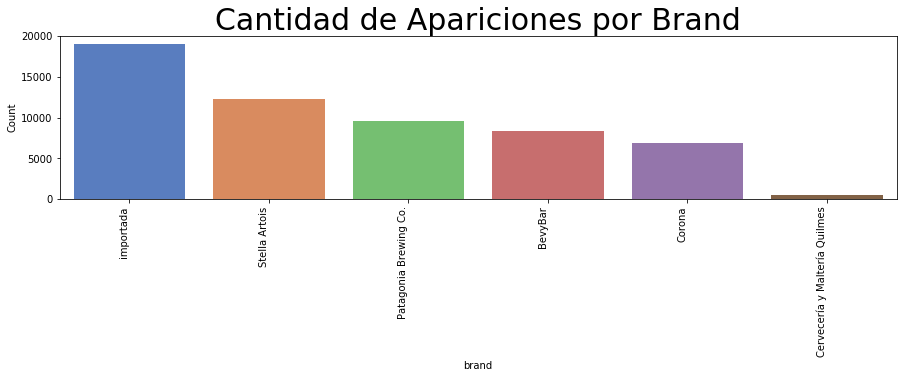

In [46]:
plt.figure(figsize=(15,3))
g = sns.countplot(x="brand",data=tp_arg_2017, palette = "muted", order = tp_arg_2017['brand'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cantidad de Apariciones por Brand',size = 30)
plt.xlabel("brand")
plt.ylabel("Count")
plt.show()

In [47]:
#Me fijo las cantidades totales de categoría por todos los meses.
tp_pivot_cat = pd.pivot_table(data = tp_arg_2017, values = ['quantity'], index = ['month'], columns = ['category'], aggfunc= np.sum, )
tp_pivot_cat

quantity                       
category     Beer Merchandise Mixed Pack
month                                   
1            3302         687       1351
2            2810        2546       2445
3            1850        1033       2335
4            3275         370       1976
5            2092         534       4785
6            2828         796       2556
7            4004         583       3140
8            1428         329        813
9            4997        1043       3390
10           3218         442       4256
11           2354         176       5583
12           2385         118       4598

In [48]:
#Idem anterior pero por marca
tp_pivot_brand = pd.pivot_table(data = tp_arg_2017, values = ['quantity'], index = ['month'], columns = ['brand'], aggfunc= np.sum, )
tp_pivot_brand

quantity                                                             \
brand  BevyBar Cervecería y Maltería Quilmes Corona Patagonia Brewing Co.   
month                                                                       
1          255                            56    419                   953   
2          238                            92    386                   665   
3          286                            30    275                   576   
4          461                            18    635                   650   
5         1857                            37    585                  1162   
6          798                            17    624                   729   
7          722                            80   1047                  1721   
8          121                            30    246                   561   
9          141                            88   1042                  2627   
10        1555                            61   1180                  1687   
11        1468                            74   1768                  1213   
12        1451                            38   1546                   843   

                               
brand Stella Artois importada  
month                          
1              1252      2405  
2              4156      2264  
3              2456      1595  
4               964      2893  
5              1362      2408  
6              1636      2376  
7               971      3186  
8               464      1148  
9              1414      4118  
10              729      2704  
11             1697      1893  
12             1111      2112

In [49]:
#esta sería la pivot de las pivots, la idea es ver todo por mes para saber mejor la distribución
tp_pivot_two = pd.pivot_table(data = tp_arg_2017, values = ['quantity'], index = ['month'], columns = ['brand', 'category'], aggfunc= np.sum, )
tp_pivot_two

quantity                                                       \
brand     BevyBar                        Cervecería y Maltería Quilmes   
category     Beer Merchandise Mixed Pack                          Beer   
month                                                                    
1             NaN         NaN      255.0                          56.0   
2             NaN         NaN      238.0                          92.0   
3             1.0         NaN      285.0                          30.0   
4            19.0         NaN      442.0                          18.0   
5             9.0         NaN     1848.0                          14.0   
6            32.0         NaN      766.0                           3.0   
7            39.0         NaN      683.0                           3.0   
8             2.0         NaN      119.0                           8.0   
9             1.0         1.0      139.0                           NaN   
10           23.0         NaN     1532.0                           NaN   
11           14.0         NaN     1454.0                           1.0   
12            6.0         NaN     1445.0                           NaN   

                                                               \
brand                           Corona                          
category Merchandise Mixed Pack   Beer Merchandise Mixed Pack   
month                                                           
1                NaN        NaN  284.0       124.0       11.0   
2                NaN        NaN  191.0       172.0       23.0   
3                NaN        NaN   55.0        81.0      139.0   
4                NaN        NaN  192.0        52.0      391.0   
5                NaN       23.0  140.0       105.0      340.0   
6                NaN       14.0  359.0       133.0      132.0   
7               15.0       62.0  600.0       189.0      258.0   
8                2.0       20.0  136.0        87.0       23.0   
9               33.0       55.0  565.0       307.0      170.0   
10              15.0       46.0  831.0       254.0       95.0   
11              12.0       61.0  438.0        50.0     1280.0   
12               8.0       30.0  209.0        54.0     1283.0   

                                                                     \
brand    Patagonia Brewing Co.                        Stella Artois   
category                  Beer Merchandise Mixed Pack          Beer   
month                                                                 
1                        406.0       115.0      432.0         269.0   
2                        254.0        67.0      344.0         115.0   
3                        161.0        45.0      370.0          75.0   
4                        297.0        24.0      329.0          56.0   
5                        245.0        21.0      896.0          70.0   
6                        274.0        24.0      431.0         121.0   
7                        367.0        25.0     1329.0         117.0   
8                        241.0        50.0      270.0          44.0   
9                        712.0       199.0     1716.0         211.0   
10                       336.0        30.0     1321.0         145.0   
11                       283.0        31.0      899.0         217.0   
12                       213.0        27.0      603.0         148.0   

                                                                  
brand                           importada                         
category Merchandise Mixed Pack      Beer Merchandise Mixed Pack  
month                                                             
1              444.0      539.0    2287.0         4.0      114.0  
2             2306.0     1735.0    2158.0         1.0      105.0  
3              907.0     1474.0    1528.0         NaN       67.0  
4              288.0      620.0    2693.0         6.0      194.0  
5              403.0      889.0    1614.0         5.0      789.0  
6              639.0      876.0    2039.0  

In [50]:
#Hacemos 2 datasets que agrupen por, mes y día c/u, así podemos ver la variación
tp_by_month = tp_arg_2017.groupby(['month']).sum() 
tp_by_day = tp_arg_2017.groupby(['day']).sum() 

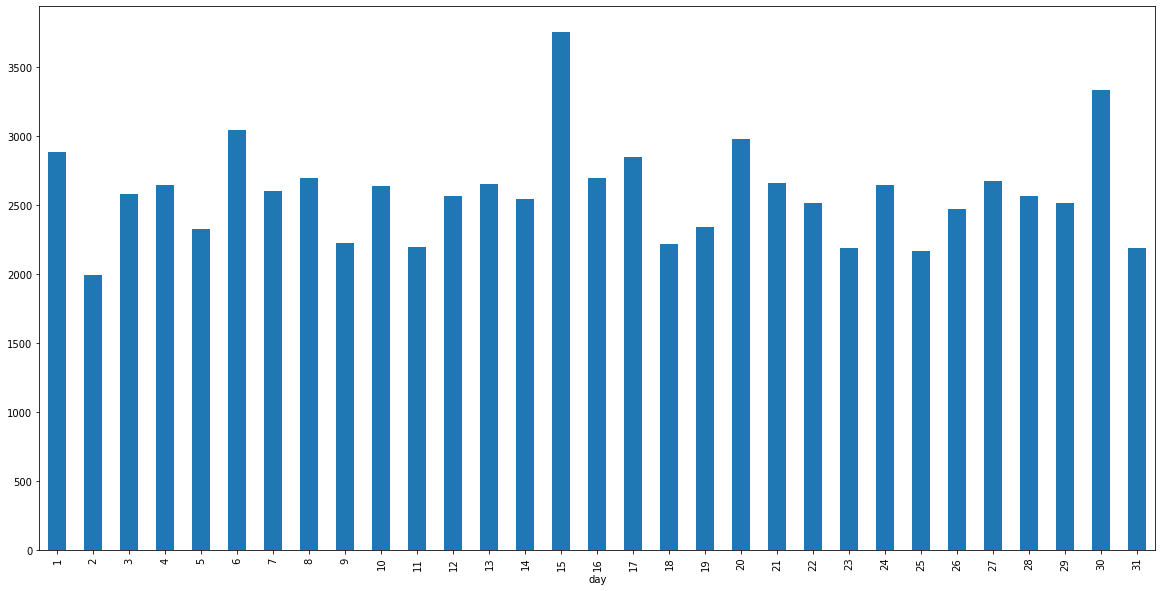

In [51]:
#Vemos los días del mes en que se dieron mayores compras
tp_by_day.quantity.plot.bar(figsize=(20,10))

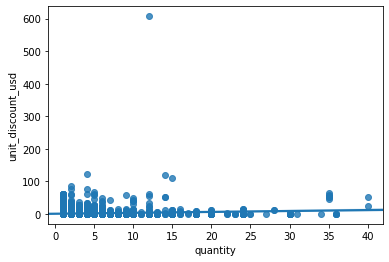

In [52]:
##VER QUE PODEMOS COMPARAR CON ESTE GRAFICO
corr = tp_arg_2017[['quantity', 'unit_discount_usd']]
corr.corr()
sns.regplot(x='quantity', y='unit_discount_usd', data= corr);

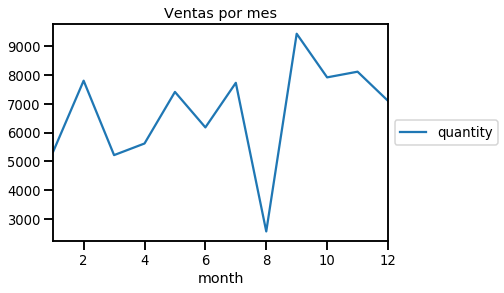

In [53]:
sns.set_context("talk", font_scale=0.8)
tp_by_month[('quantity')].plot(title = "Ventas por mes" )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [54]:
#La idea ahora es ver si hay estacionalidad en algún mes con respecto a una marca (elegí las mas importantes)
#Primero filtramos por marca
tp_corona = tp_arg_2017.loc[tp_arg_2017['brand'] == 'Corona']
tp_importada = tp_arg_2017.loc[tp_arg_2017['brand'] == 'importada']
tp_Stella = tp_arg_2017.loc[tp_arg_2017['brand'] == 'Stella Artois']
tp_Patagonia = tp_arg_2017.loc[tp_arg_2017['brand'] == 'Patagonia Brewing Co.']
tp_BevyBar = tp_arg_2017.loc[tp_arg_2017['brand'] == 'BevyBar']

In [55]:
#Segundo agrupamos por mes y sumamos. Acá estaría creando varios datasets, tal vez no es necesario.
tp_BevyBar_month = tp_BevyBar.groupby(['month']).sum()
tp_Patagonia_month = tp_Patagonia.groupby(['month']).sum()
tp_importada_month = tp_importada.groupby(['month']).sum()
tp_Stella_month = tp_Stella.groupby(['month']).sum()
tp_Corona_month = tp_corona.groupby(['month']).sum()

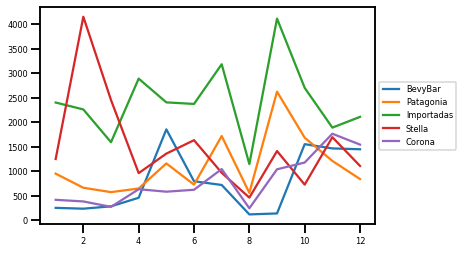

In [56]:
#visualizamos la variación por mes de cada una. Con barras tal vez quede mas lindo.
sns.set_context("talk", font_scale=0.5)
plt.plot(tp_BevyBar_month['quantity'], label='BevyBar')
plt.plot(tp_Patagonia_month['quantity'], label='Patagonia')
plt.plot(tp_importada_month['quantity'], label='Importadas')
plt.plot(tp_Stella_month['quantity'], label='Stella')
plt.plot(tp_Corona_month['quantity'], label='Corona')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [57]:
#Hacemos filtrado por categoría. Hago lo mismo que para Brand pero ahora con category.
tp_beer = tp_arg_2017.loc[tp_arg_2017['category'] == 'Beer']
tp_pack = tp_arg_2017.loc[tp_arg_2017['category'] == 'Mixed Pack']
tp_Merchandise = tp_arg_2017.loc[tp_arg_2017['category'] == 'Merchandise']

In [58]:
tp_beer_month = tp_beer.groupby(['month']).sum()
tp_Merchandise_month = tp_Merchandise.groupby(['month']).sum()
tp_pack_month = tp_pack.groupby(['month']).sum()

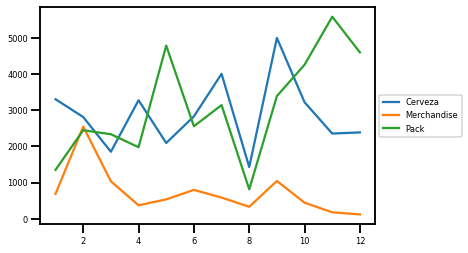

In [59]:
#visualizamos la variación por mes de cada una.
sns.set_context("talk", font_scale=0.5)
plt.plot(tp_beer_month['quantity'], label='Cerveza')
plt.plot(tp_Merchandise_month['quantity'], label='Merchandise')
plt.plot(tp_pack_month['quantity'], label='Pack')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

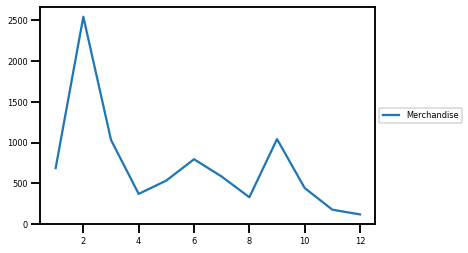

In [60]:
#Analizamos Merchandise por separado
plt.plot(tp_Merchandise_month['quantity'], label='Merchandise')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [61]:
#Acá la idea es mostrar en qué meses se gasta más
tp_by_month['unit_net_revenue_local']

month
1     1.004554e+06
2     2.273109e+06
3     1.924778e+06
4     1.809021e+06
5     3.528797e+06
6     2.214526e+06
7     2.524177e+06
8     6.694069e+05
9     2.773249e+06
10    3.540251e+06
11    4.982922e+06
12    3.869201e+06
Name: unit_net_revenue_local, dtype: float64

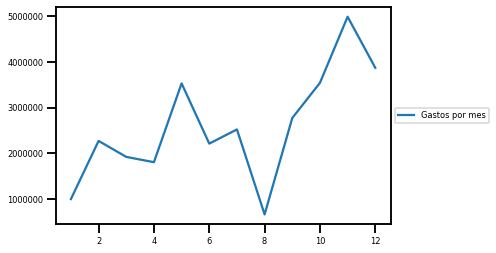

In [62]:
plt.plot(tp_by_month['unit_net_revenue_local'], label='Gastos por mes')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [63]:
##Usar solo 2017?
#Ver correlacion entre compradores recurrentes y algun producto en particular
#Clusterizar los que generan compras recurrentes

In [64]:
#Borrar budweiser
#Usar solo 2017
#Juntar Bevybar y craftsociety
#Usar mas boxplot
#1° Definir 2017, las features finales finales
#2a-Regresion de 2017, predecir y comparar con enero 2018
#2-Clustering: armar el clustering y hacer un eda de los clusters
#2b
#Regresion, lineas de tiempo, etc --> Ver si podemos aplicarlo y ver si alguna marca esta creciendo, o no


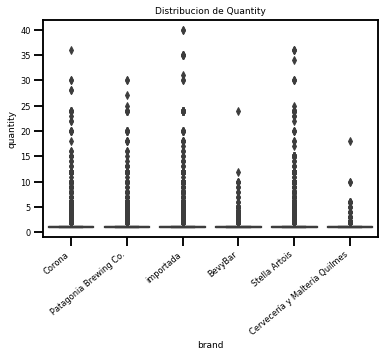

In [65]:
ay = sns.boxplot(x = tp_arg_2017.brand, y = tp_arg_2017.quantity, data = tp_arg_2017)
ay.set_xticklabels(ay.get_xticklabels(), rotation=40, ha="right")
plt.title("Distribucion de Quantity")
plt.show()

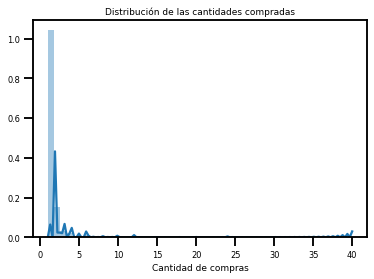

In [66]:
#VER QUE TITULOS PONEMOS EN LOS EJES
sns.distplot((tp_arg_2017['quantity']))
plt.title('Distribución de las cantidades compradas')
plt.xlabel('Cantidad de compras')
plt.show()

# -----------------------------------------Clustering------------------------------------------------

In [124]:
#Exporto el dataset y pasemos todo el resto a un notebook nuevo
tp_h.to_csv(r'C:\Users\avelurta\Documents\UTN\Ciencia de Datos\TP\tp_grupo13_limpio.csv')

In [128]:
#Si esta bien este shape deberia coincidir con el del otro
tp_h.shape

(56731, 19)

In [68]:
##CLUSTERING
#Pase la order_time a int pero igual tira error asi que la saco tambien
#Limpio variables
tp_cluster = tp_h.drop(['order_time','name','id','customer_spk','country','order_date','order_status','subcategory'], axis=1)
#tp_cluster['order_time'] = pd.to_datetime(tp_cluster['order_time']).astype(np.int64)
tp_cluster1= tp_cluster.loc[tp_h['brand'].isin(['Corona', 'Patagonia Brewing Co.', 'Peñón del Águila',
       'Bass Brewery', 'Leffe', "Fuller's",
       'Spaten-Franziskaner-Bräu', 'Karlsberg Brauerei',
       'Les Brasseurs de Gayant\xa0', 'Barba Roja', 'Coopers Brewery',
       'Brouwerij Van Steenberge', 'Hoegaarden', 'Backus y Johnston',
       'Löwenbräu', 'Brauerei Beck & Co',
       'Fabricas Nacionales De Cerveza',
       'De La Vaca Tranquila Cervezas Artesanales',
       'Paulaner Brauerei München', 'Duvel Moortgat', 'Zillertal',
       'Baltika Breweries', 'Hofbräu München', 'Chimay',
       'Kronenbourg 1664', 'Czechvar', 'Kulmbacher Brauerei AG',
       'Grimbergen', 'Maredsous', 'Tsingtao',
       'Fábricas Nacionales De Cerveza',
       'Anchor Brewing Company', 'Cervecería Antares',
       'Brasserie de Silly', 'SAB Miller', 'Shock Top', 'Belsh',
       'OETTINGER Brauerei GmbH', 'Erdinger Weissbräu', 'Oranjeboom',
       'BevyBar','Stella Artois', 'Cervecería y Maltería Quilmes'])]
tp_cluster1.head(5)

,unit_discount_usd,unit_gross_revenue_local,unit_price_charged_local,unit_delivery_charged_local,quantity,unit_net_revenue_local,brand,category,year,month,day
17162,0.0000,1030.0000,890.0,140.0000,1,788.0530,Corona,Beer,2017,9,20
17165,0.0000,631.0000,432.0,199.0000,1,493.6944,Patagonia Brewing Co.,Mixed Pack,2017,6,13
17174,2.7181,234.6542,265.0,14.7222,1,176.2018,Peñón del Águila,Beer,2017,2,28
17175,1.8052,155.8458,44.0,9.7778,4,117.0246,Peñón del Águila,Beer,2017,2,28
17176,9.0465,910.0000,1011.0,49.0000,1,698.5160,BevyBar,Mixed Pack,2017,7,30


In [69]:
#Genero dummies de brand y category
brands = pd.get_dummies(tp_cluster1.brand)
category = pd.get_dummies(tp_cluster1.category)
#concateno las tablas
tp_cluster1 = pd.concat([tp_cluster1,brands,category],axis=1)
tp_cluster1 = tp_cluster1.drop(['brand','category'], axis=1)
tp_cluster1.head(3)

,unit_discount_usd,unit_gross_revenue_local,unit_price_charged_local,unit_delivery_charged_local,quantity,unit_net_revenue_local,year,month,day,Anchor Brewing Company,...,Peñón del Águila,SAB Miller,Shock Top,Spaten-Franziskaner-Bräu,Stella Artois,Tsingtao,Zillertal,Beer,Merchandise,Mixed Pack
17162,0.0000,1030.0000,890.0,140.0000,1,788.0530,2017,9,20,0,...,0,0,0,0,0,0,0,1,0,0
17165,0.0000,631.0000,432.0,199.0000,1,493.6944,2017,6,13,0,...,0,0,0,0,0,0,0,0,0,1
17174,2.7181,234.6542,265.0,14.7222,1,176.2018,2017,2,28,0,...,1,0,0,0,0,0,0,1,0,0


In [70]:
#AutoScaling
scaler = preprocessing.StandardScaler().fit(tp_cluster1)
xscal = scaler.transform(tp_cluster1)

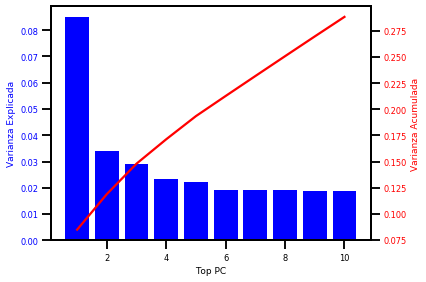

In [71]:
# Generamos el PCA
import matplotlib.cm as cm
from sklearn import decomposition

n_comps = 10
components = range(1,n_comps + 1)
pca = decomposition.PCA(n_components=n_comps)
pca.fit(xscal)
xpca = pca.transform(xscal)
eigenvalues = pca.explained_variance_ratio_
eigenvalues_acum = pca.explained_variance_ratio_.cumsum() 

#Visualizo autovalores
fig, ax1 = plt.subplots()
ax1.set_xlabel('Top PC')
ax1.set_ylabel('Varianza Explicada', color='blue')
ax1.bar(components, eigenvalues, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()  
ax2.set_ylabel('Varianza Acumulada', color='red')  
ax2.plot(components, eigenvalues_acum, color='red')
ax2.tick_params(axis='y', labelcolor='red')
fig.tight_layout()  
plt.show()

In [72]:
#Encontramos que con 10 PC explicamos el 90% de la varianza
#Como las primeras 4 componentes explican el 50% de la varianza utilizamos 4 dimensiones.

reduced_dim = 10
xpca_rd = xpca[:,0:reduced_dim]
kmeans_rd = KMeans(n_clusters=3, random_state=10).fit(xpca_rd)
# una vez realizado el clustering, observamos las labels de cluster asignadas a cada muestra
kmeans_rd.labels_ = kmeans_rd.labels_
kmeans_rd.labels_
# visualizamos los centroides finales de cada cluster
centers_rd = kmeans_rd.cluster_centers_
centers_rd

array([[-2.32542326e+00,  9.07677904e-01,  4.37354806e-01,
         1.11581840e-01, -1.27229346e-01,  1.19794242e-02,
        -5.70221931e-02, -3.42250384e-02, -4.16408598e-02,
        -2.36113822e-02],
       [ 1.56142710e+00, -2.07031742e-02, -4.07909728e-01,
         9.38171809e-02,  1.24778817e-02, -3.95427243e-03,
         1.66206810e-02,  1.36718068e-02,  2.43717046e-03,
        -2.60748987e-03],
       [-1.20382318e+00, -2.93972156e+00,  8.88007941e-01,
        -9.19427739e-01,  3.56606014e-01, -1.74808107e-02,
         9.59591450e-02,  3.61913728e-02,  1.26249785e-01,
         9.46899105e-02]])

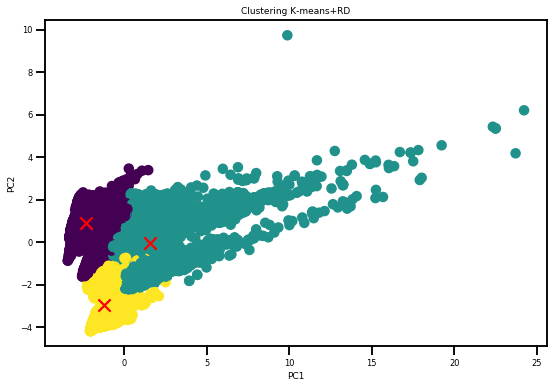

In [73]:
# K-Means + RD (Con las 3 primeras PC)
plt.figure(figsize=(9,6))
plt.scatter(xpca_rd[:,0],xpca_rd[:,1],c=kmeans_rd.labels_.astype(float))
plt.scatter(centers_rd[:,0], centers_rd[:,1], marker="x", color='r',s=150)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering K-means+RD')
plt.show()

In [74]:
sill_score_rd = silhouette_score(xpca,kmeans_rd.labels_)
print(sill_score_rd)

0.26417261173289297


In [75]:
#Con 4 PC y 5 clusters obtenemos un silhouette de 48%
#Con 4 PC y 5 clusters obtenemos un silhouette de 44%
#Con 3 PC y 3 clusters obtenemos un silhouette de 49%
#Esto daba antes, ahora no se porque da menos, la concha de la gorra, 

In [130]:
tp_arg.shape

(122018, 30)

In [76]:
#Clustering de importadas
tp_importadas = tp_cluster.loc[tp_arg['brand'].isin(['Peñón del Águila',
       'Bass Brewery', 'Leffe', "Fuller's",
       'Spaten-Franziskaner-Bräu', 'Karlsberg Brauerei',
       'Les Brasseurs de Gayant\xa0', 'Barba Roja', 'Coopers Brewery',
       'Brouwerij Van Steenberge', 'Hoegaarden', 'Backus y Johnston',
       'Löwenbräu', 'Brauerei Beck & Co',
       'Fabricas Nacionales De Cerveza',
       'De La Vaca Tranquila Cervezas Artesanales',
       'Paulaner Brauerei München', 'Duvel Moortgat', 'Zillertal',
       'Baltika Breweries', 'Hofbräu München', 'Chimay',
       'Kronenbourg 1664', 'Czechvar', 'Kulmbacher Brauerei AG',
       'Grimbergen', 'Maredsous', 'Tsingtao',
       'Fábricas Nacionales De Cerveza',
       'Anchor Brewing Company', 'Cervecería Antares',
       'Brasserie de Silly', 'SAB Miller', 'Shock Top', 'Belsh',
       'OETTINGER Brauerei GmbH', 'Erdinger Weissbräu', 'Oranjeboom'])]

In [77]:
tp_importadas.shape

(18818, 11)

In [78]:
#Genero dummies de brand
brands_i = pd.get_dummies(tp_importadas.brand)
category_i = pd.get_dummies(tp_importadas.category)
tp_cluster2 = pd.concat([tp_importadas,brands_i,category_i],axis=1)
tp_cluster2 = tp_cluster2.drop(['brand','category'], axis=1)
tp_cluster2.head(3)

,unit_discount_usd,unit_gross_revenue_local,unit_price_charged_local,unit_delivery_charged_local,quantity,unit_net_revenue_local,year,month,day,Anchor Brewing Company,...,Paulaner Brauerei München,Peñón del Águila,SAB Miller,Shock Top,Spaten-Franziskaner-Bräu,Tsingtao,Zillertal,Beer,Merchandise,Mixed Pack
17174,2.7181,234.6542,265.0,14.7222,1,176.2018,2017,2,28,0,...,0,1,0,0,0,0,0,1,0,0
17175,1.8052,155.8458,44.0,9.7778,4,117.0246,2017,2,28,0,...,0,1,0,0,0,0,0,1,0,0
17177,2.7181,234.6542,265.0,14.7222,1,176.2018,2017,2,28,0,...,0,1,0,0,0,0,0,1,0,0


In [79]:
#AutoScaling
scaler_impo = preprocessing.StandardScaler().fit(tp_cluster2)
##Hacer clustering sobre este xscal
xscal_impo = scaler_impo.transform(tp_cluster2)
#PCA sobre los clusters para visualizarlo
#Crear 3 datasets por las etiquetas de los clusters y hacer un displot o boxplot de alguna de las variables


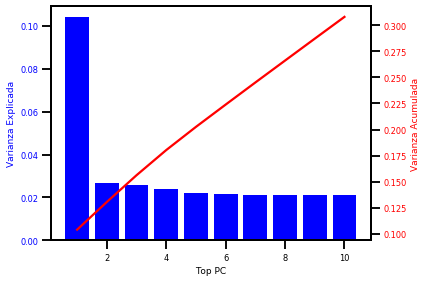

In [80]:
# Generamos el PCA

n_comps = 10
components = range(1,n_comps + 1)
pca_impo = decomposition.PCA(n_components=n_comps)
pca_impo.fit(xscal_impo)
xpca_impor = pca_impo.transform(xscal_impo)
eigenvalues_impo = pca_impo.explained_variance_ratio_
eigenvalues_acum_impo = pca_impo.explained_variance_ratio_.cumsum() 

#Visualizo autovalores
fig, ax1 = plt.subplots()
ax1.set_xlabel('Top PC')
ax1.set_ylabel('Varianza Explicada', color='blue')
ax1.bar(components, eigenvalues_impo, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()  
ax2.set_ylabel('Varianza Acumulada', color='red')  
ax2.plot(components, eigenvalues_acum_impo, color='red')
ax2.tick_params(axis='y', labelcolor='red')
fig.tight_layout()  
plt.show()

In [81]:
#Encontramos que con 2 PC explicamos el 60% de la varianza CORREGIR ESTO
reduced_dim = 2
xpca_rd_impo = xpca_impor[:,0:reduced_dim]
kmeans_rd_impo = KMeans(n_clusters=3, random_state=10).fit(xpca_rd_impo)
# una vez realizado el clustering, observamos las labels de cluster asignadas a cada muestra
kmeans_rd_impo.labels_ = kmeans_rd_impo.labels_
kmeans_rd_impo.labels_
##Concatenar las labels a cada sample

array([0, 0, 0, ..., 0, 0, 0])

In [82]:
# visualizamos los centroides finales de cada cluster
centers_rd_impo = kmeans_rd_impo.cluster_centers_
centers_rd_impo

array([[-1.17014818, -0.04817579],
       [ 3.72131477, -0.25655665],
       [ 0.32325565,  5.06977123]])

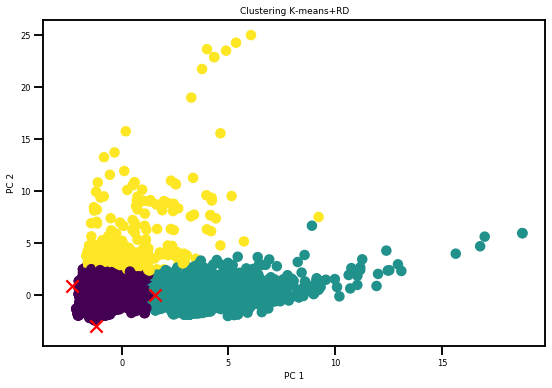

In [83]:
# K-Means + RD (Con las 2 primeras PC)
plt.figure(figsize=(9,6))
plt.scatter(xpca_rd_impo[:,0],xpca_rd_impo[:,1],c=kmeans_rd_impo.labels_.astype(float))
plt.scatter(centers_rd[:,0], centers_rd[:,1], marker="x", color='r',s=150)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Clustering K-means+RD')
plt.show()

In [84]:
sill_score_rd = silhouette_score(xpca_rd_impo,kmeans_rd_impo.labels_)
print(sill_score_rd)

0.7072937631129712


In [85]:
#Haciendo clustering con las importadas encontramos distribuciones
#similares a las vistas solo para las marcas core de negocio, pero con un Silhouette mucho mas alto
#OJO QUE USE LAS MISMAS VARIABLES, DEL SCALER EN ADELANTE QUEDAN LAS DE LA SEGUNDA PARTE

In [86]:
##Notas Martin
##Buscar borrar el id que haya hecho compras ENOOORMES que genere los outliers
##Dejar el EDA como ya esta, ponerle foco a clustering
##Hacer el clustering sobre los datos auto-escalados
##Crear 3 ( o los que sean) datasets por las etiquetas de los clusters (##Concatenar las labels a cada sample) y hacer un displot o boxplot de alguna de las variables (quantity, price)
##Si alcanza el tiempo (Aplicar PCA sobre los clusters para visualizar las componentes y blabla)

In [87]:
##Agrego las labels al tp_importadas
tp_importadas ['labels'] = kmeans_rd_impo.labels_

C:\Users\avelurta\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [88]:
tp_importadas['labels'].value_counts()

0    14068
1     4393
2      357
Name: labels, dtype: int64

In [89]:
#Clustering de las nacionales
tp_nacional = tp_cluster.loc[tp_h['brand'].isin(['Corona', 'Patagonia Brewing Co.', 'BevyBar',
       'Stella Artois', 'Cervecería y Maltería Quilmes'])]

In [90]:
brandsnac = pd.get_dummies(tp_nacional.brand)
category = pd.get_dummies(tp_nacional.category)
tp_nac = pd.concat([tp_nacional,brandsnac,category],axis=1)
tp_nac = tp_nac.drop(['brand','category'], axis=1)
tp_nac.head(3)

,unit_discount_usd,unit_gross_revenue_local,unit_price_charged_local,unit_delivery_charged_local,quantity,unit_net_revenue_local,year,month,day,BevyBar,Cervecería y Maltería Quilmes,Corona,Patagonia Brewing Co.,Stella Artois,Beer,Merchandise,Mixed Pack
17162,0.0000,1030.0,890.0,140.0,1,788.0530,2017,9,20,0,0,1,0,0,1,0,0
17165,0.0000,631.0,432.0,199.0,1,493.6944,2017,6,13,0,0,0,1,0,0,0,1
17176,9.0465,910.0,1011.0,49.0,1,698.5160,2017,7,30,1,0,0,0,0,0,0,1


In [91]:
#AutoScaling
scaler_nac = preprocessing.StandardScaler().fit(tp_nac)
xscal_nac = scaler_nac.transform(tp_nac)

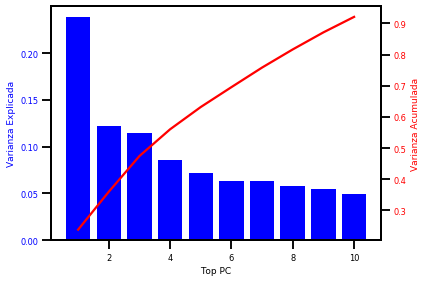

In [92]:
n_comps = 10
components = range(1,n_comps + 1)
pca_nac = decomposition.PCA(n_components=n_comps)
pca_nac.fit(xscal_nac)
xpca_nac = pca_nac.transform(xscal_nac)
eigenvalues_nac = pca_nac.explained_variance_ratio_
eigenvalues_acum_nac = pca_nac.explained_variance_ratio_.cumsum() 

#Visualizo autovalores
fig, ax1 = plt.subplots()
ax1.set_xlabel('Top PC')
ax1.set_ylabel('Varianza Explicada', color='blue')
ax1.bar(components, eigenvalues_nac, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()  
ax2.set_ylabel('Varianza Acumulada', color='red')  
ax2.plot(components, eigenvalues_acum_nac, color='red')
ax2.tick_params(axis='y', labelcolor='red')
fig.tight_layout()  
plt.show()

In [93]:
#Encontramos que con 3 PC explicamos el 50% de la varianza
reduced_dim_nac = 3
xpca_rd_nac = xpca_nac[:,0:reduced_dim_nac]
kmeans_rd_nac = KMeans(n_clusters=3, random_state=10).fit(xpca_rd_nac)
# una vez realizado el clustering, observamos las labels de cluster asignadas a cada muestra
kmeans_rd_nac.labels_ = kmeans_rd_nac.labels_
kmeans_rd_nac.labels_
##Concatenar las labels a cada sample

array([2, 0, 0, ..., 2, 2, 2])

In [94]:
# visualizamos los centroides finales de cada cluster
centers_rd_nac = kmeans_rd_nac.cluster_centers_
centers_rd_nac

array([[ 0.4049143 , -0.81317507,  0.01827194],
       [ 3.01039214,  1.42037067,  0.05299433],
       [-2.45315553,  1.29202047, -0.07036679]])

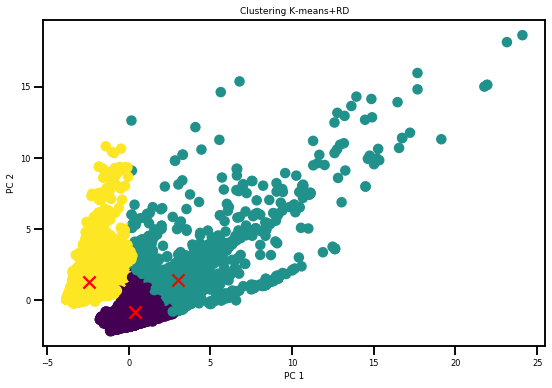

In [95]:
# K-Means + RD (Con las 3 primeras PC)
plt.figure(figsize=(9,6))
plt.scatter(xpca_rd_nac[:,0],xpca_rd_nac[:,1],c=kmeans_rd_nac.labels_.astype(float))
plt.scatter(centers_rd_nac[:,0], centers_rd_nac[:,1], marker="x", color='r',s=150)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Clustering K-means+RD')
plt.show()

In [96]:
sill_score_rd = silhouette_score(xpca_rd_nac,kmeans_rd_nac.labels_)
print(sill_score_rd)

0.4373766877733081


In [97]:
tp_nacional['labels'] = kmeans_rd_nac.labels_
tp_nacional.labels.value_counts()

C:\Users\avelurta\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    23402
2     9593
1     4667
Name: labels, dtype: int64

## EDA de los Clusters encontrados

In [98]:
#Voy a volver a meter los id de usuario, si rompe algo lo sacamos
tp_aux= tp_h.loc[tp_h['brand'].isin(['Corona', 'Patagonia Brewing Co.', 'BevyBar',
       'Stella Artois', 'Cervecería y Maltería Quilmes'])]
tp_nacional['id'] = tp_aux['id']
tp_nacional['name'] = tp_aux['name']
tp_nacional['labels'] = kmeans_rd_nac.labels_
tp_nacional.labels.value_counts()

C:\Users\avelurta\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\avelurta\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\avelurta\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

0    23402
2     9593
1     4667
Name: labels, dtype: int64

In [99]:
tp_nacional.head(5)

,unit_discount_usd,unit_gross_revenue_local,unit_price_charged_local,unit_delivery_charged_local,quantity,unit_net_revenue_local,brand,category,year,month,day,labels,id,name
17162,0.0000,1030.0,890.0,140.0,1,788.0530,Corona,Beer,2017,9,20,2,"[""ar_bevybar;8b3eb4b88a85ba3eeb60dd24686995c38...",Pack Corona Experience
17165,0.0000,631.0,432.0,199.0,1,493.6944,Patagonia Brewing Co.,Mixed Pack,2017,6,13,0,"[""ar_bevybar;41434b744330c691cf83b70da3fa080c8...",Pack de Cervezas y Vasos Patagonia
17176,9.0465,910.0,1011.0,49.0,1,698.5160,BevyBar,Mixed Pack,2017,7,30,0,"[""ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74...",Pack Degustación del Mes de Julio XL
17182,0.0000,820.0,690.0,130.0,1,627.3820,Stella Artois,Mixed Pack,2017,9,24,0,"[""ar_bevybar;0f725d8dfc2bfa356bb643582d5efff86...",Copas Stella Artois 330ml - Pack 6 unidades
17189,0.0000,314.0,209.0,105.0,1,235.7826,Stella Artois,Merchandise,2017,2,14,2,"[""ar_bevybar;7b2eb6f3e8e3919aa0a7f7d66b5c1852d...",Copa Edición Limitada Stella Artois Uganda


In [100]:
#Hago EDA de lo nacional
tp_nac_0 = tp_nacional.loc[tp_nacional['labels'].isin(['0'])]
tp_nac_1 = tp_nacional.loc[tp_nacional['labels'].isin(['1'])]
tp_nac_2 = tp_nacional.loc[tp_nacional['labels'].isin(['2'])]

In [101]:
tp_nac_0.isnull().sum()
tp_nac_1.isnull().sum()
tp_nac_2.isnull().sum()

unit_discount_usd              0
unit_gross_revenue_local       0
unit_price_charged_local       0
unit_delivery_charged_local    0
quantity                       0
unit_net_revenue_local         0
brand                          0
category                       0
year                           0
month                          0
day                            0
labels                         0
id                             0
name                           0
dtype: int64

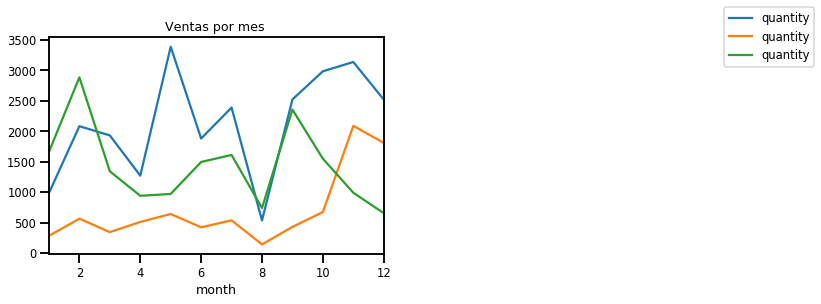

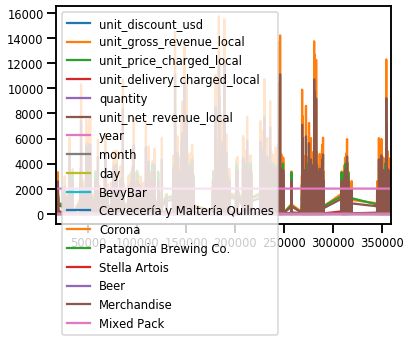

In [102]:
#Esto seria en volumen de ventas totales no? Habria que ver porque aca capaz hay algo interesante
sns.set_context("talk", font_scale=0.7)
tp_nac_0.groupby(['month']).sum()[('quantity')].plot(title = "Ventas por mes " )
tp_nac_1.groupby(['month']).sum()[('quantity')].plot(title = "Ventas por mes " )
tp_nac_2.groupby(['month']).sum()[('quantity')].plot(title = "Ventas por mes " )
plt.legend(loc='center left', bbox_to_anchor=(2, 1))
plt.show()
tp_nac.plot()

In [103]:
tp_pivot_nac = pd.pivot_table(data = tp_nacional, values = ['quantity'], index = ['labels'], columns = ['category'], aggfunc= np.sum, )
tp_pivot_nac

quantity                       
category     Beer Merchandise Mixed Pack
labels                                  
0            44.0         NaN    25598.0
1           520.0       437.0     7514.0
2          9184.0      8029.0        NaN

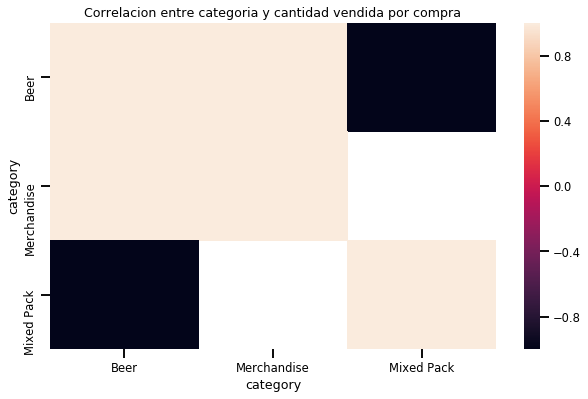

In [104]:
plt.figure(figsize=(10,6))
sns.heatmap(tp_pivot_nac.quantity.corr())
plt.title("Correlacion entre categoria y cantidad vendida por compra")
plt.show()

In [105]:
#Esto tarda mil años, cualquier cosa despues lo agregamos
#sns.set_style("white")
#sns.set_context("talk")
#sns.set_style("ticks")
#sns.pairplot(tp_nacional)
#plt.show()

In [106]:
#Vamos a comparar boxplots de los clusters - Cuando quiero hacer un boxplot con cada uno me tira error, en los ultimos 2,
#me dan una mano?

#Los tire por separado y el del cluster 2 no tiene IQR, no se que onda
comprasporusuario_nac_0 = tp_nac_0.groupby(['id'])['id'].count()
comprasporusuario_nac_1 = tp_nac_1.groupby(['id'])['id'].count()
comprasporusuario_nac_2 = tp_nac_2.groupby(['id'])['id'].count()

In [107]:
comprasporusuario_nac_0 = comprasporusuario_nac_0.loc[comprasporusuario_nac_0 < 10]

In [108]:
comprasporusuario_nac_1 = comprasporusuario_nac_1.loc[comprasporusuario_nac_1 < 10]

In [109]:
comprasporusuario_nac_2 = comprasporusuario_nac_2.loc[comprasporusuario_nac_2 < 10]

Text(0.5, 0, 'id')

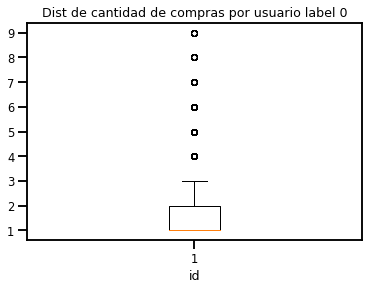

In [110]:
plt.boxplot(comprasporusuario_nac_0)
plt.title("Dist de cantidad de compras por usuario label 0")
plt.xlabel("id")

Text(0.5, 0, 'id')

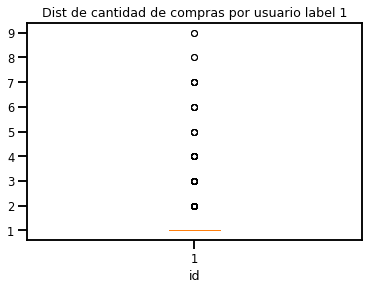

In [111]:
plt.boxplot(comprasporusuario_nac_1)
plt.title("Dist de cantidad de compras por usuario label 1")
plt.xlabel("id")

Text(0.5, 0, 'id')

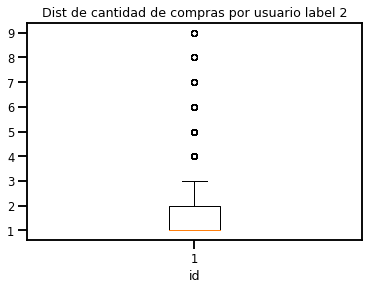

In [112]:
plt.boxplot(comprasporusuario_nac_2)
plt.title("Dist de cantidad de compras por usuario label 2")
plt.xlabel("id")

Text(0.5, 0, 'unit_gross_revenue_local')

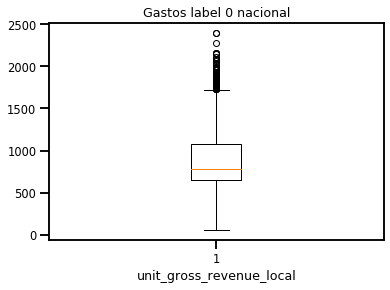

In [113]:
#Boxplots de los precios
plt.boxplot(tp_nac_0['unit_gross_revenue_local'])
plt.title("Gastos label 0 nacional")
plt.xlabel("unit_gross_revenue_local")


Text(0.5, 0, 'unit_gross_revenue_local')

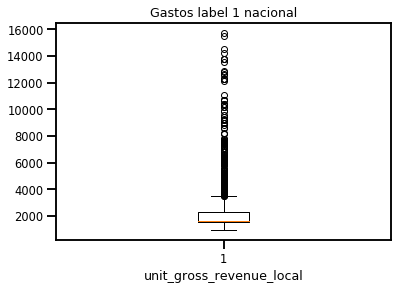

In [114]:
plt.boxplot(tp_nac_1['unit_gross_revenue_local'])
plt.title("Gastos label 1 nacional")
plt.xlabel("unit_gross_revenue_local")


Text(0.5, 0, 'unit_gross_revenue_local')

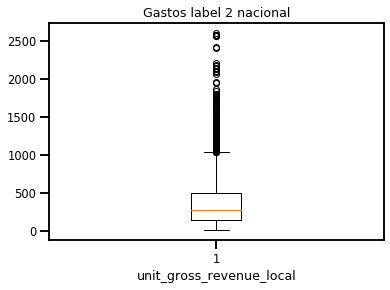

In [115]:
plt.boxplot(tp_nac_2['unit_gross_revenue_local'])
plt.title("Gastos label 2 nacional")
plt.xlabel("unit_gross_revenue_local")

In [116]:
#A mi consideración habría que trabajar sobre 1 ó 2 Clusters: nacionales e importadas, y se me ocurre
#tirar estos grafiquitos y ver como se comporta cada label, así definimos, por ej: dentro de las nac
#hay 3 grupos: uno que, el 50%, gasta entre 600 y 1000, hace entre 1 y 2 compras y adquiere tal 
#marca y tal categoría; otro grupo que gasta tanto, hace x compras y adquiere esto y lo otro, capicce?
#Basicamente sería ver cómo carajo clasificó el cluster xD

## Hasta aca creo que podemos decir que solo en casos muy aislados, quien gasta mas de 2000 pesos vuelve a realizar una compra

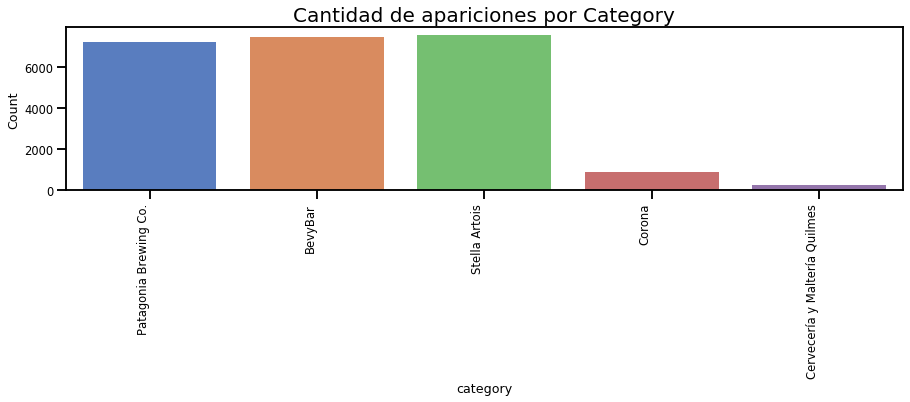

In [117]:
plt.figure(figsize=(15,3))
g = sns.countplot(x="brand",data= tp_nac_0, palette = "muted")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cantidad de apariciones por Category',size = 20)
plt.xlabel("category")
plt.ylabel("Count")
plt.show()

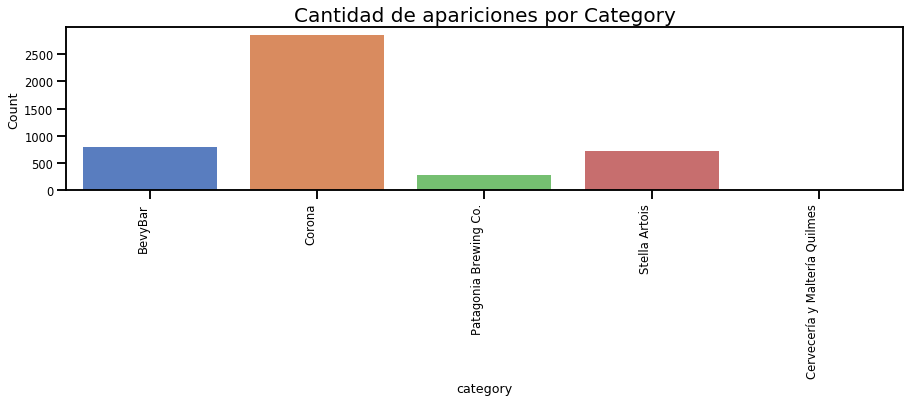

In [118]:
plt.figure(figsize=(15,3))
g = sns.countplot(x="brand",data= tp_nac_1, palette = "muted")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cantidad de apariciones por Category',size = 20)
plt.xlabel("category")
plt.ylabel("Count")
plt.show()

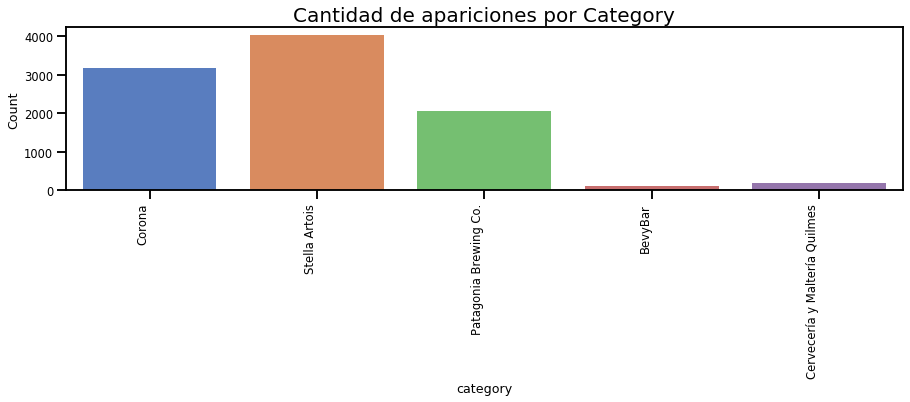

In [119]:
plt.figure(figsize=(15,3))
g = sns.countplot(x="brand",data= tp_nac_2, palette = "muted")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cantidad de apariciones por Category',size = 20)
plt.xlabel("category")
plt.ylabel("Count")
plt.show()

In [120]:
# En las tp_nac_1 vamos a ver si hay algun producto de Corona que haya sido una compra por unica vez
aux1= tp_nac_1.loc[tp_nac_1['brand'].isin(["Corona"])]
aux1.name.value_counts()

Pack Conservadora Corona                       2601
Pack Corona Experience                           72
Pack de Cervezas y Frapera Corona                34
Cerveza Corona Extra 710ml                       26
Pack de Cervezas y Gorra Corona by Martha        21
Cerveza Corona Sunsets Edición Limitada          16
Pack Cervezas Corona Sunsets y Frapera           14
Pack Modelo Mexicano                             13
Pack de 24 Cervezas Corona 355ml                 12
Frapera Corona                                   11
Cerveza Corona Extra                              9
Pack de 12 Cervezas Corona 710ml                  7
Pack de 24 Cervezas Corona Edición Especial       6
Cerveza Negra Modelo                              3
Cooler Corona                                     2
Frapera Corona Jumbo                              2
Cortador de Lima Corona                           1
Name: name, dtype: int64

In [121]:
#Validamos que en el resto no aparece
aux2= tp_nac_2.loc[tp_nac_2['brand'].isin(["Corona"])]
aux2.name.value_counts()

Pack Corona Experience                     1096
Frapera Corona                              554
Cerveza Negra Modelo                        399
Cortador de Lima Corona                     368
Porta Lima Corona                           282
Cerveza Corona Extra                        195
Cerveza Corona Sunsets Edición Limitada     173
Cerveza Corona Extra 710ml                  101
Gorra Corona by Martha                       11
Name: name, dtype: int64

In [122]:
aux0= tp_nac_0.loc[tp_nac_0['brand'].isin(["Corona"])]
aux0.name.value_counts()

Pack de Cervezas y Frapera Corona              426
Pack Modelo Mexicano                           236
Pack Cervezas Corona Sunsets y Frapera         122
Pack de 24 Cervezas Corona 355ml                84
Pack de 12 Cervezas Corona 710ml                24
Pack de 12 Cervezas Corona Edición Especial      9
Pack de 24 Cervezas Corona Edición Especial      2
Frapera Corona Jumbo                             1
Name: name, dtype: int64

# Aca podriamos concluir que atraer personas a comprar la conservadora Corona (uno de los productos mas promocionados) no genera una fidelidad de compra en la plataforma